In [22]:
import pandas as pd
import openpyxl 
from datetime import datetime 
from scipy.stats import kurtosis
import numpy as np 
import pylab as p
import os
from pathlib import Path
from openpyxl import load_workbook

In [23]:
file_name_str = r"..\Refinitiv\Refinitiv_ESG & Financial Data (2012-2022) edited by KN (04032023).xlsx";
fin_file = pd.ExcelFile(file_name_str)
fin_file.sheet_names

['AU-404',
 'CN-934',
 'HK-349',
 'MY-331',
 'SG-92',
 'rm & rfr',
 'Description',
 'Variables',
 'Multiple rics']

In [24]:
#get the sorted fin file
# file_name_str = r"..\Sray\fin concate esg\AU_bloom_fin_esg.xlsx";
# file_name_str = r"..\Sray\fin concate esg\CN_bloom_fin_esg.xlsx";
# file_name_str = r"..\Sray\fin concate esg\HK_bloom_fin_esg.xlsx";
# file_name_str = r"..\Sray\fin concate esg\MY_bloom_fin_esg.xlsx";


findata_sheet = pd.read_excel(fin_file, sheet_name="AU-404", index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="CN-934", index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="HK-349", index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="MY-331", index_col=0, header=0)
# findata_sheet = pd.read_excel(fin_file, sheet_name="SG-92", index_col=0, header=0)

fin_data = pd.DataFrame(findata_sheet)

fin_data.head() 


,Unnamed: 1,Name,esg,e,s,g,sec,mv,pe,roa,vol_180d,vol_90d,beta_5y,beta_6m,pcf,ps,px,ret_ln
NaN,NaN,TR.CommonName,TR.TRESGScore,TR.EnvironmentPillarScore,TR.SocialPillarScore,TR.GovernancePillarScore,TR.GICSSector,TR.CompanyMarketCap(Curn=USD),TR.PE,TR.ROATotalAssetsPercent,TR.Volatility180D,TR.Volatility90D,TR.BetaFiveYear,TR.BetaDaily180D,TR.PriceToCFPerShare,TR.PriceToSalesPerShare,TR.PriceClose,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beta 5 year,price to sales per share,NaN,price close,NaN,NaN,NaN
NaN,FY2022,NaN,44.923553,9.098544,48.674929,54.084995,Financials,265936714.732453,NaN,-32.942493,106.005616,81.360458,3.642453,2.260445,NaN,0.635799,0.51,NaN
ZIP.AX,FY2021,NaN,43.747028,5.396175,44.270549,58.366074,Financials,1851050194.00178,NaN,-29.093539,106.005616,81.360458,3.642453,2.260445,NaN,6.472536,4.33,-2.138912
ZIP.AX,FY2020,NaN,19.346104,0,25.685632,18.350084,Financials,2204400738.98792,NaN,-1.977102,106.005616,81.360458,3.642453,2.260445,195.862844,17.886973,5.29,-0.200251


In [25]:
fin_data = fin_data.reset_index()
fin_data = fin_data.rename({'index': 'tkr',
                            'Unnamed:1': 'year',
                            'Name':'Name'.lower()}, axis=1)
fin_data.drop([0,1], axis=0, inplace=True)

fin_data.head()

,tkr,Unnamed: 1,name,esg,e,s,g,sec,mv,pe,roa,vol_180d,vol_90d,beta_5y,beta_6m,pcf,ps,px,ret_ln
2,NaN,FY2022,NaN,44.923553,9.098544,48.674929,54.084995,Financials,265936714.732453,NaN,-32.942493,106.005616,81.360458,3.642453,2.260445,NaN,0.635799,0.51,NaN
3,ZIP.AX,FY2021,NaN,43.747028,5.396175,44.270549,58.366074,Financials,1851050194.00178,NaN,-29.093539,106.005616,81.360458,3.642453,2.260445,NaN,6.472536,4.33,-2.138912
4,ZIP.AX,FY2020,NaN,19.346104,0,25.685632,18.350084,Financials,2204400738.98792,NaN,-1.977102,106.005616,81.360458,3.642453,2.260445,195.862844,17.886973,5.29,-0.200251
5,ZIP.AX,FY2019,NaN,15.90525,0,20.57958,15.82716,Financials,969030065.884996,NaN,-2.186735,106.005616,81.360458,3.642453,2.260445,61.092418,16.754346,3.54,0.401692
6,ZIP.AX,FY2018,NaN,NaN,NaN,NaN,NaN,Financials,231813463.415665,NaN,-8.884506,106.005616,81.360458,3.642453,2.260445,230.688187,8.319292,1.09,1.177949


In [331]:
print (fin_data.columns)

Index(['Year', 'Dates', 'Tkr & Exch', 'Name', 'Sec_no', 'PX_LAST',
       'MARKET_RETURN', 'HISTORICAL_MARKET_CAP', 'TRAIL_12M_SALES_PER_SH',
       'IS_EPS', 'CF_FREE_CASH_FLOW', 'PE_RATIO', 'RETURN_COM_EQY',
       'RETURN_ON_ASSET', 'VOLATILITY_180D', 'VOLATILITY_360D',
       'BETA_RAW_OVERRIDABLE', 'esg', 'g', 's', 'e'],
      dtype='object')


In [332]:
fin_data ['es'] = fin_data['e'] * fin_data['s']
fin_data ['eg'] = fin_data['e'] * fin_data['g']
fin_data ['sg'] = fin_data['s'] * fin_data['g']
fin_data['esg_cubic'] = fin_data['esg']**3

In [333]:
fin_data = fin_data.rename({'Name': 'firm_name',
                            'Tkr & Exch': 'tkr',
                            'Sec_no': 'sec_no',
                            'Dates': 'date',
                            'Year':'Year'.lower(),
                            'PE_RATIO': 'pe',
                            'BETA_RAW_OVERRIDABLE': 'beta',
                            'CF_FREE_CASH_FLOW': 'fcf',
                            'RETURN_ON_ASSET': 'roa',
                            'PX_LAST': 'px', 
                            'MARKET_RETURN': 'ret', 
                            'HISTORICAL_MARKET_CAP': 'HISTORICAL_MARKET_CAP'.lower(), 
                            # 'TRAIL_12M_SALES_PER_SH': 'TRAIL_12M_SALES_PER_SH'.lower(), 
                            'TRAIL_12M_SALES_PER_SH': 'sales'.lower(), 
                            'IS_EPS': 'IS_EPS'.lower(),
                            'RETURN_COM_EQY': 'RETURN_COM_EQY'.lower(),
                            'VOLATILITY_180D':'vol_180d',
                            'VOLATILITY_360D':'vol_360d'}, axis=1)
fin_data.head()

,year,date,tkr,firm_name,sec_no,px,ret,historical_market_cap,sales,is_eps,...,vol_360d,beta,esg,g,s,e,es,eg,sg,esg_cubic
firm no,,,,,,,,,,,,,,,,,,,,,
1,2017,2017-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,27.67,NaN,NaN,NaN,NaN,...,15.649,0.3789,33.075142,83.594223,13.724305,1.721534,23.626858,143.910298,1147.272626,36183.048018
1,2018,2018-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,26.15,-0.054933,NaN,NaN,NaN,...,16.718,0.7217,35.700634,83.594223,16.505442,6.825732,112.661725,570.591782,1379.759572,45501.717133
1,2019,2019-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,21.68,-0.170937,10294.6898,39.3150,1.0408,...,11.053,0.3144,35.851524,83.594223,16.958887,6.825732,115.756822,570.591782,1417.664990,46081.104273
1,2020,2020-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,20.96,-0.033210,9466.3814,45.3489,1.3300,...,17.307,0.6655,42.530933,83.594223,18.561064,25.279371,469.212022,2113.209399,1551.597704,76933.367285
1,2021,2021-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,21.10,0.006679,9537.3792,41.5251,0.9300,...,11.606,0.8379,37.078766,83.594223,18.561064,8.909695,165.373411,744.799003,1551.597704,50977.180564


In [334]:
fin_data['ep'] = 1/fin_data['pe']
fin_data['sp'] = fin_data['sales'] / fin_data['px']
fin_data['cfp'] = fin_data['fcf'] /fin_data['px']
fin_data.head()

,year,date,tkr,firm_name,sec_no,px,ret,historical_market_cap,sales,is_eps,...,g,s,e,es,eg,sg,esg_cubic,ep,sp,cfp
firm no,,,,,,,,,,,,,,,,,,,,,
1,2017,2017-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,27.67,NaN,NaN,NaN,NaN,...,83.594223,13.724305,1.721534,23.626858,143.910298,1147.272626,36183.048018,NaN,NaN,NaN
1,2018,2018-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,26.15,-0.054933,NaN,NaN,NaN,...,83.594223,16.505442,6.825732,112.661725,570.591782,1379.759572,45501.717133,NaN,NaN,NaN
1,2019,2019-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,21.68,-0.170937,10294.6898,39.3150,1.0408,...,83.594223,16.958887,6.825732,115.756822,570.591782,1417.664990,46081.104273,0.097823,1.813423,169.681734
1,2020,2020-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,20.96,-0.033210,9466.3814,45.3489,1.3300,...,83.594223,18.561064,25.279371,469.212022,2113.209399,1551.597704,76933.367285,0.096851,2.163593,126.216603
1,2021,2021-12-31,GE SP Equity,GREAT EASTERN HOLDINGS LTD,7.0,21.10,0.006679,9537.3792,41.5251,0.9300,...,83.594223,18.561064,8.909695,165.373411,744.799003,1551.597704,50977.180564,0.111375,1.968014,109.255924


In [335]:
fin_data['date'] = fin_data['date'].astype('datetime64')
fin_data.dtypes

year                              int64
date                     datetime64[ns]
tkr                              object
firm_name                        object
sec_no                          float64
px                              float64
ret                             float64
historical_market_cap           float64
sales                           float64
is_eps                          float64
fcf                             float64
pe                              float64
return_com_eqy                  float64
roa                             float64
vol_180d                        float64
vol_360d                        float64
beta                            float64
esg                             float64
g                               float64
s                               float64
e                               float64
es                              float64
eg                              float64
sg                              float64
esg_cubic                       float64


In [336]:
sectors = []
sectors = (fin_data['sec_no'].drop_duplicates()).to_list()
print(sectors)
len(sectors)

[7.0, 11.0, 8.0, 9.0, 6.0, 3.0, 5.0, 2.0, 10.0, 1.0, 4.0, nan]


12

In [337]:
#initial_year=2017
#stop_year=2020
#start_date = '01-'+ str(initial_year) 
#end_date = '12-'+ str(initial_year) 
#print(start_date)
#print(end_date)
    

#temp_dataframe = fin_data.loc[(fin_data['sec_no']==1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#temp_dataframe

## **Add new indicators** 

In [338]:
# companies_sec = []
# initial_year = 2017
# stop_year = 2023

# for year in range(initial_year, stop_year+1, 1):

#     start_date = '01-' + str(year)
#     if (year < 2021):
#         end_date = '12-' + str(year)
#     elif (year == 2021):
#         end_date = '02-' + str(year)

#     for month in range(1, 13):
#         m = str(month)
#         if (month < 10):
#             start_date = '0' + m + '-' + str(year)
#         else:
#             start_date = m + '-' + str(year)

#         for k in range(len(sectors)):

#             # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#             temp_dataframe = fin_data.loc[(
#                 fin_data['sec_no'] == k+1) & (fin_data['date'] == start_date)].copy()
#         print(temp_dataframe)


In [339]:
#seperate each of the companies and store into list companies_financial=[]

# temp_dataframe2 = temp_dataframe.loc[fin_data['date']== (str(m)+ '-' + str(year)) ].copy()

#initialize counter to track the number of company
companies_sec=[]
initial_year=2017
stop_year=2023

for year in range(initial_year,stop_year+1,1):    

    # start_date = '01-'+ str(year) 
    # if (year <2021):
    #     end_date = '12-'+ str(year) 
    # elif (year==2021):    
    #     end_date = '02-'+ str(year) 

    # for month in range (1,13):
    #     m=str(month)
    #     if (month<10):
    #         start_date = '0'+ m + '-' + str(year) 
    #     else:
    #         start_date = m + '-' + str(year)  

    
        for k in range (len(sectors)):
        
            # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
            # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['year']>=initial_year& (fin_data['year']<=stop_year))].copy()
            temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['year'] == year)].copy()

            # temp_dataframe = fin_data.copy()

            
            temp_dataframe['ep_sec_mean']= temp_dataframe['ep'].mean()

            temp_dataframe['ep_sec_sd']= temp_dataframe['ep'].std()

            temp_dataframe['sp_sec_mean'] = temp_dataframe['sp'].mean()

            temp_dataframe['sp_sec_sd'] = temp_dataframe['sp'].std()

            temp_dataframe['cfp_sec_mean'] = temp_dataframe['cfp'].mean()

            temp_dataframe['cfp_sec_sd'] = temp_dataframe['cfp'].std()

            temp_dataframe['roa_sec_mean'] = temp_dataframe['roa'].mean()

            temp_dataframe['roa_sec_sd'] = temp_dataframe['roa'].std()

            companies_sec.append(temp_dataframe)



In [340]:
len(companies_sec)

84

In [341]:
companies_sec[3]

,year,date,tkr,firm_name,sec_no,px,ret,historical_market_cap,sales,is_eps,...,sp,cfp,ep_sec_mean,ep_sec_sd,sp_sec_mean,sp_sec_sd,cfp_sec_mean,cfp_sec_sd,roa_sec_mean,roa_sec_sd
firm no,,,,,,,,,,,,,,,,,,,,,
52,2017,2017-12-31,GENS SP Equity,GENTING SINGAPORE LTD,4.0,1.350,NaN,15771.3979,0.1990,0.0230,...,0.147407,470.802963,0.02927,0.010861,0.193902,0.065753,241.98564,323.596562,4.67095,2.604486
56,2017,2017-12-31,MAND SP Equity,MANDARIN ORIENTAL INTL LTD,4.0,2.020,NaN,2536.9180,0.4856,0.0317,...,0.240396,13.168317,0.02927,0.010861,0.193902,0.065753,241.98564,323.596562,4.67095,2.604486
66,2017,2017-12-31,BTH SP Equity,BANYAN TREE HOLDINGS LTD,4.0,0.565,NaN,NaN,NaN,NaN,...,NaN,NaN,0.02927,0.010861,0.193902,0.065753,241.98564,323.596562,4.67095,2.604486


In [342]:
#combine all the data 
new_companies_data = pd.concat(companies_sec)
new_companies_data.head()

,year,date,tkr,firm_name,sec_no,px,ret,historical_market_cap,sales,is_eps,...,sp,cfp,ep_sec_mean,ep_sec_sd,sp_sec_mean,sp_sec_sd,cfp_sec_mean,cfp_sec_sd,roa_sec_mean,roa_sec_sd
firm no,,,,,,,,,,,,,,,,,,,,,
41,2017,2017-12-31,MMT SP Equity,MERMAID MARITIME PCL,1.0,0.142,NaN,153.1304,0.0892,-0.0044,...,0.628169,77.471831,0.027513,NaN,0.628169,NaN,77.471831,NaN,-0.6023,NaN
59,2017,2017-12-31,EZRA SP Equity,EZRA HOLDINGS LTD,1.0,0.011,NaN,NaN,NaN,NaN,...,NaN,NaN,0.027513,NaN,0.628169,NaN,77.471831,NaN,-0.6023,NaN
26,2017,2017-12-31,CSSC SP Equity,CHINA SUNSINE CHEMICAL HLDGS,2.0,0.438,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2017,2017-12-31,NANO SP Equity,NANOFILM TECHNOLOGIES INTERN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2017,2017-12-31,HACL SP Equity,HALCYON AGRI CORP LTD,2.0,0.585,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
new_companies_data.dtypes

year                              int64
date                     datetime64[ns]
tkr                              object
firm_name                        object
sec_no                          float64
px                              float64
ret                             float64
historical_market_cap           float64
sales                           float64
is_eps                          float64
fcf                             float64
pe                              float64
return_com_eqy                  float64
roa                             float64
vol_180d                        float64
vol_360d                        float64
beta                            float64
esg                             float64
g                               float64
s                               float64
e                               float64
es                              float64
eg                              float64
sg                              float64
esg_cubic                       float64


In [344]:
try:
    new_companies_data['ep_z'] = new_companies_data.apply(
        lambda row: (row.ep - row.ep_sec_mean)/row.ep_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['ep_z'] = np.nan

try:
    new_companies_data['sp_z'] = new_companies_data.apply(
        lambda row: (row.sp - row.sp_sec_mean)/row.sp_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['sp_z'] = np.nan

try:
    new_companies_data['cfp_z'] = new_companies_data.apply(
        lambda row: (row.cfp - row.cfp_sec_mean)/row.cfp_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['cfp_z'] = np.nan


# read the column FROM ep_z to cfp_z
col = new_companies_data.loc[:, "ep_z":"cfp_z"]

new_companies_data['value'] = col.mean(axis=1)

try:
    new_companies_data['roa_z'] = new_companies_data.apply(
        lambda row: (row.roa - row.roa_sec_mean)/row.roa_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['roa_z'] = np.nan


try:
    new_companies_data['esg_value'] = new_companies_data.apply(
        lambda row: (row.esg + row.value)/2, axis=1)
except ZeroDivisionError:
    new_companies_data['esg_value'] = np.nan


In [345]:
new_companies_data.head()

,year,date,tkr,firm_name,sec_no,px,ret,historical_market_cap,sales,is_eps,...,cfp_sec_mean,cfp_sec_sd,roa_sec_mean,roa_sec_sd,ep_z,sp_z,cfp_z,value,roa_z,esg_value
firm no,,,,,,,,,,,,,,,,,,,,,
41,2017,2017-12-31,MMT SP Equity,MERMAID MARITIME PCL,1.0,0.142,NaN,153.1304,0.0892,-0.0044,...,77.471831,NaN,-0.6023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,2017,2017-12-31,EZRA SP Equity,EZRA HOLDINGS LTD,1.0,0.011,NaN,NaN,NaN,NaN,...,77.471831,NaN,-0.6023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2017,2017-12-31,CSSC SP Equity,CHINA SUNSINE CHEMICAL HLDGS,2.0,0.438,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2017,2017-12-31,NANO SP Equity,NANOFILM TECHNOLOGIES INTERN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2017,2017-12-31,HACL SP Equity,HALCYON AGRI CORP LTD,2.0,0.585,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [346]:
new_companies_data.columns

Index(['year', 'date', 'tkr', 'firm_name', 'sec_no', 'px', 'ret',
       'historical_market_cap', 'sales', 'is_eps', 'fcf', 'pe',
       'return_com_eqy', 'roa', 'vol_180d', 'vol_360d', 'beta', 'esg', 'g',
       's', 'e', 'es', 'eg', 'sg', 'esg_cubic', 'ep', 'sp', 'cfp',
       'ep_sec_mean', 'ep_sec_sd', 'sp_sec_mean', 'sp_sec_sd', 'cfp_sec_mean',
       'cfp_sec_sd', 'roa_sec_mean', 'roa_sec_sd', 'ep_z', 'sp_z', 'cfp_z',
       'value', 'roa_z', 'esg_value'],
      dtype='object')

In [347]:

#sorting the company
# new_companies_data['date'] = pd.to_datetime(
#     new_companies_data['date'], format='%m%Y', errors='coerce').dt.to_period('m')

new_companies_data = new_companies_data.sort_values(
    by=["sec_no", "firm_name", "date"])

# #arrange according to the Portfolio-no normalization
# new_companies_data = new_companies_data[['firm_name', 'tkr', 'sec_no', 'year',
#                                             'date', 'esg', 'g', 's', 'e', 'es', 'eg', 'sg', 'esg_cubic', 
#                                             'ep', 'sp', 'cfp','ep_sec_mean', 'ep_sec_sd', 'sp_sec_mean', 
#                                             'sp_sec_sd', 'cfp_sec_mean','cfp_sec_sd', 'roa_sec_mean', 
#                                             'roa_sec_sd', 'ep_z', 'sp_z', 'cfp_z', 'value', 'roa_z', 'esg_value'
#                                             'px','ret','historical_market_cap', 'sales','is_eps', 'fcf','pe', 
#                                             'return_com_eqy', 'roa', 'roa_sec_mean', 'roa_sec_sd', 'roa_z','vol_180d', 
#                                             'vol_360d','beta']]

new_companies_data = new_companies_data[['firm_name', 'tkr', 'sec_no','year',
                                            'date', 'esg', 'e', 's', 
                                            'g', 'es', 'eg', 'sg', 'esg_cubic', 
                                            'px', 'fcf', 'pe', 'beta', 'roa', 'vol_180d', 'sales',
                                            'ret', 'historical_market_cap', 'ep', 'ep_sec_mean', 'ep_sec_sd', 'ep_z', 
                                            'sp', 'sp_sec_mean', 'sp_sec_sd', 'sp_z', 
                                            'cfp', 'cfp_sec_mean', 'cfp_sec_sd', 'cfp_z', 
                                            'value', 'roa_sec_mean', 'roa_sec_sd', 'roa_z', 'esg_value']]

new_companies_data.head()


,firm_name,tkr,sec_no,year,date,esg,e,s,g,es,...,sp_z,cfp,cfp_sec_mean,cfp_sec_sd,cfp_z,value,roa_sec_mean,roa_sec_sd,roa_z,esg_value
firm no,,,,,,,,,,,,,,,,,,,,,
59,EZRA HOLDINGS LTD,EZRA SP Equity,1.0,2017,2017-12-31,27.190422,0.0,0.846433,80.523781,0.0,...,NaN,NaN,77.471831,NaN,NaN,NaN,-0.6023,NaN,NaN,NaN
59,EZRA HOLDINGS LTD,EZRA SP Equity,1.0,2018,2018-12-31,27.190422,0.0,0.846433,80.523781,0.0,...,NaN,NaN,88.120879,NaN,NaN,NaN,-6.3187,NaN,NaN,NaN
59,EZRA HOLDINGS LTD,EZRA SP Equity,1.0,2019,2019-12-31,27.190422,0.0,0.846433,80.523781,0.0,...,NaN,NaN,29.957895,NaN,NaN,NaN,-5.9765,NaN,NaN,NaN
59,EZRA HOLDINGS LTD,EZRA SP Equity,1.0,2020,2020-12-31,27.190422,0.0,0.846433,80.523781,0.0,...,NaN,NaN,-134.845070,NaN,NaN,NaN,-33.5734,NaN,NaN,NaN
59,EZRA HOLDINGS LTD,EZRA SP Equity,1.0,2021,2021-12-31,27.190422,0.0,0.846433,80.523781,0.0,...,NaN,NaN,-363.140845,NaN,NaN,NaN,-6.8196,NaN,NaN,NaN


In [348]:
# new_companies_data.to_excel("SG_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
describe_df_path = ""
new_companies_data.to_excel( "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
describe_df_path = "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Descriptive Statistics.xlsx"


## **Descriptive Section**

In [349]:
#Descriptive statistics for e, s, g, esg, ret, value_z, roa_z, vol_90d, vol_180d
describe_df= new_companies_data.describe(include="all")
print(describe_df)

describe_df.to_excel( describe_df_path, sheet_name="main")


                firm_name             tkr      sec_no         year  \
count                 735             735  735.000000   735.000000   
unique                105             105         NaN          NaN   
top     EZRA HOLDINGS LTD  EZRA SP Equity         NaN          NaN   
freq                    7               7         NaN          NaN   
first                 NaN             NaN         NaN          NaN   
last                  NaN             NaN         NaN          NaN   
mean                  NaN             NaN    8.028571  2020.000000   
std                   NaN             NaN    3.406677     2.001362   
min                   NaN             NaN    1.000000  2017.000000   
25%                   NaN             NaN    5.000000  2018.000000   
50%                   NaN             NaN   10.000000  2020.000000   
75%                   NaN             NaN   11.000000  2022.000000   
max                   NaN             NaN   11.000000  2023.000000   

                   

C:\Users\heihe\AppData\Local\Temp/ipykernel_38436/3604537088.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  describe_df= new_companies_data.describe(include="all")


## **Total number of companies in each sector**

In [350]:
df_sec_company_count = pd.DataFrame(new_companies_data.groupby(['year','sec_no' ])['tkr'].nunique())
df_sec_company_count.head()

tkr
year sec_no     
2017 1.0       2
     2.0       3
     3.0      14
     4.0       3
     5.0      13

In [351]:
book = load_workbook(describe_df_path)
writer = pd.ExcelWriter(describe_df_path, engine = 'openpyxl')
writer.book = book
df_sec_company_count.to_excel(writer, sheet_name='sec_no_count')
writer.close()

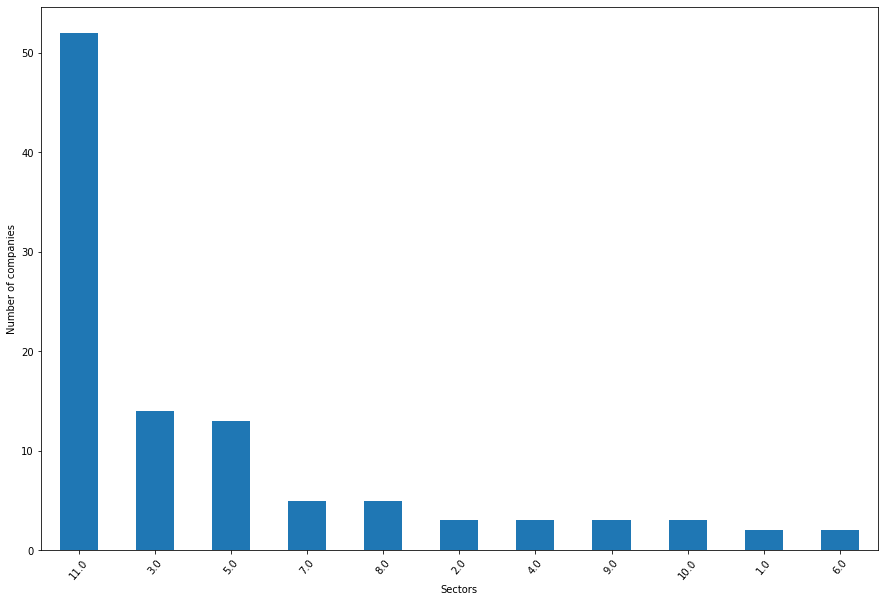

In [352]:
from matplotlib import pyplot as plt
sec_no= new_companies_data.groupby('sec_no')['tkr'].nunique()
plt.figure(figsize=(15,10))
sec_no.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Sectors")
plt.ylabel("Number of companies")
plt.show()

## **Kurtosis**

In [353]:
# new_companies_data.drop(['date', 'firm_name','tkr','sec_no' ], axis=1, inplace=True)

In [354]:
new_companies_data['px'] = new_companies_data['px'] .astype(float)
new_companies_data.dtypes

firm_name                        object
tkr                              object
sec_no                          float64
year                              int64
date                     datetime64[ns]
esg                             float64
e                               float64
s                               float64
g                               float64
es                              float64
eg                              float64
sg                              float64
esg_cubic                       float64
px                              float64
fcf                             float64
pe                              float64
beta                            float64
roa                             float64
vol_180d                        float64
sales                           float64
ret                             float64
historical_market_cap           float64
ep                              float64
ep_sec_mean                     float64
ep_sec_sd                       float64


In [355]:
# kurtosis(new_companies_data, fisher = True)

In [356]:
kurt = pd.DataFrame(new_companies_data.kurtosis())
kurt = kurt.reset_index()
kurt = kurt.rename({0:"kurtosis", "index": "variable"}, axis=1)
kurt.loc[len(kurt.index)] = ['kurtosis_mean', new_companies_data.kurtosis().mean()]
kurt

C:\Users\heihe\AppData\Local\Temp/ipykernel_38436/2506432064.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt = pd.DataFrame(new_companies_data.kurtosis())
C:\Users\heihe\AppData\Local\Temp/ipykernel_38436/2506432064.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt.loc[len(kurt.index)] = ['kurtosis_mean', new_companies_data.kurtosis().mean()]


,variable,kurtosis
0,sec_no,-1.311803
1,year,-1.250337
2,esg,0.148294
3,e,-0.397323
4,s,0.525533
5,g,3.754128
6,es,3.206701
7,eg,-0.131562
8,sg,1.137511
9,esg_cubic,3.205770


In [357]:
book = load_workbook(describe_df_path)
writer = pd.ExcelWriter(describe_df_path, engine = 'openpyxl')
writer.book = book
kurt.to_excel(writer, sheet_name='kurtosis', index=False)
writer.close()